<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/master/XGBoost_2020_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

## boston es un diccionario

In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


## Cantidad de filas y columnas

In [ ]:
boston.data.shape

(506, 13)

## Nombre de los features

In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Descripción del dataset

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Convertimos a un dataframe de pandas

In [ ]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

## Primeras 5 rows

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Agregamos el target al dataframe

In [ ]:
data['PRICE'] = boston.target

## Información sobre los datos en el dataframe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Información estadística de los features

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Separamos la variable a predecir

In [ ]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

## Creamos set de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

# RandomForest

## Hiper-parámetros



*   **n_estimators**: cantidad de árboles a construir (100)
*   **max_depth**: máxima profundidad de cada árbol
*   **min_samples_split**: la cantidad mínima de datos requeridos para splitear un nodo interno (2)
*   **min_samples_leaf**: cantidad mínima de datos requeridos para ser una hoja (1)
*   **max_features**: la cantidad de features a considerar cuando se busca el mejor split (n)



## Entrenando y prediciendo con hiper-parámetros por defecto

In [ ]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.130455


## Importancia de las features

In [ ]:
# Gini importance
rf_model.feature_importances_

array([2.98879920e-02, 1.28498143e-03, 4.99298576e-03, 4.41006218e-04,
       2.11962049e-02, 5.26398187e-01, 1.27656712e-02, 5.32214654e-02,
       4.94492864e-03, 1.55572336e-02, 1.28296243e-02, 9.24296912e-03,
       3.07236751e-01])

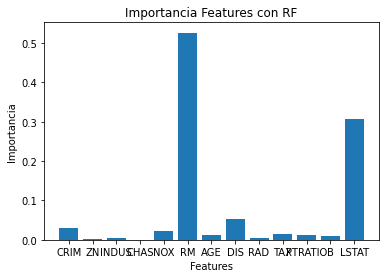

In [ ]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

## Entrenando y prediciendo con solo 5 árboles

In [ ]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=5)


rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.898585


## Entrenando y prediciendo con solo 5 árboles y max_features igual a 10

In [ ]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=5, max_features=10)

rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.845825


## Entrenando y prediciendo con solo 5 árboles y máxima profundidad de 2

In [ ]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=5, max_depth=2)


rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5.690154


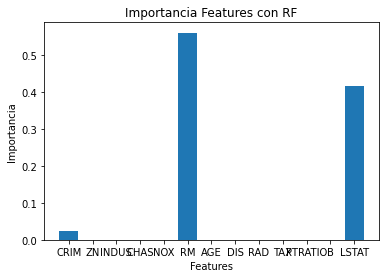

In [ ]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

### Analizando los árboles

In [ ]:
rf_model.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1791095845, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2135392491, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decre

In [ ]:
tree0 = rf_model.estimators_[0]

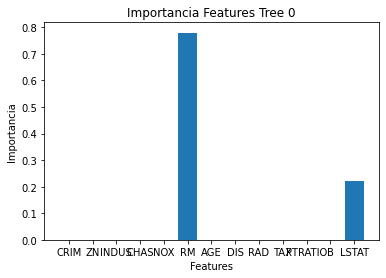

In [ ]:
plt.bar(X_train.columns, tree0.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features Tree 0')
plt.show()

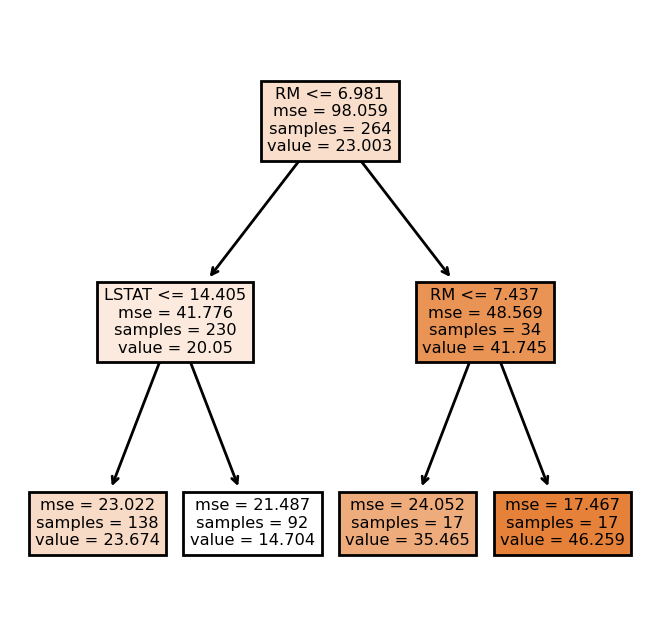

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(tree0,
               feature_names = X_train.columns,
               filled = True);

## Entrenando y prediciendo con un solo árbol

In [ ]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=1)


rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 6.027941


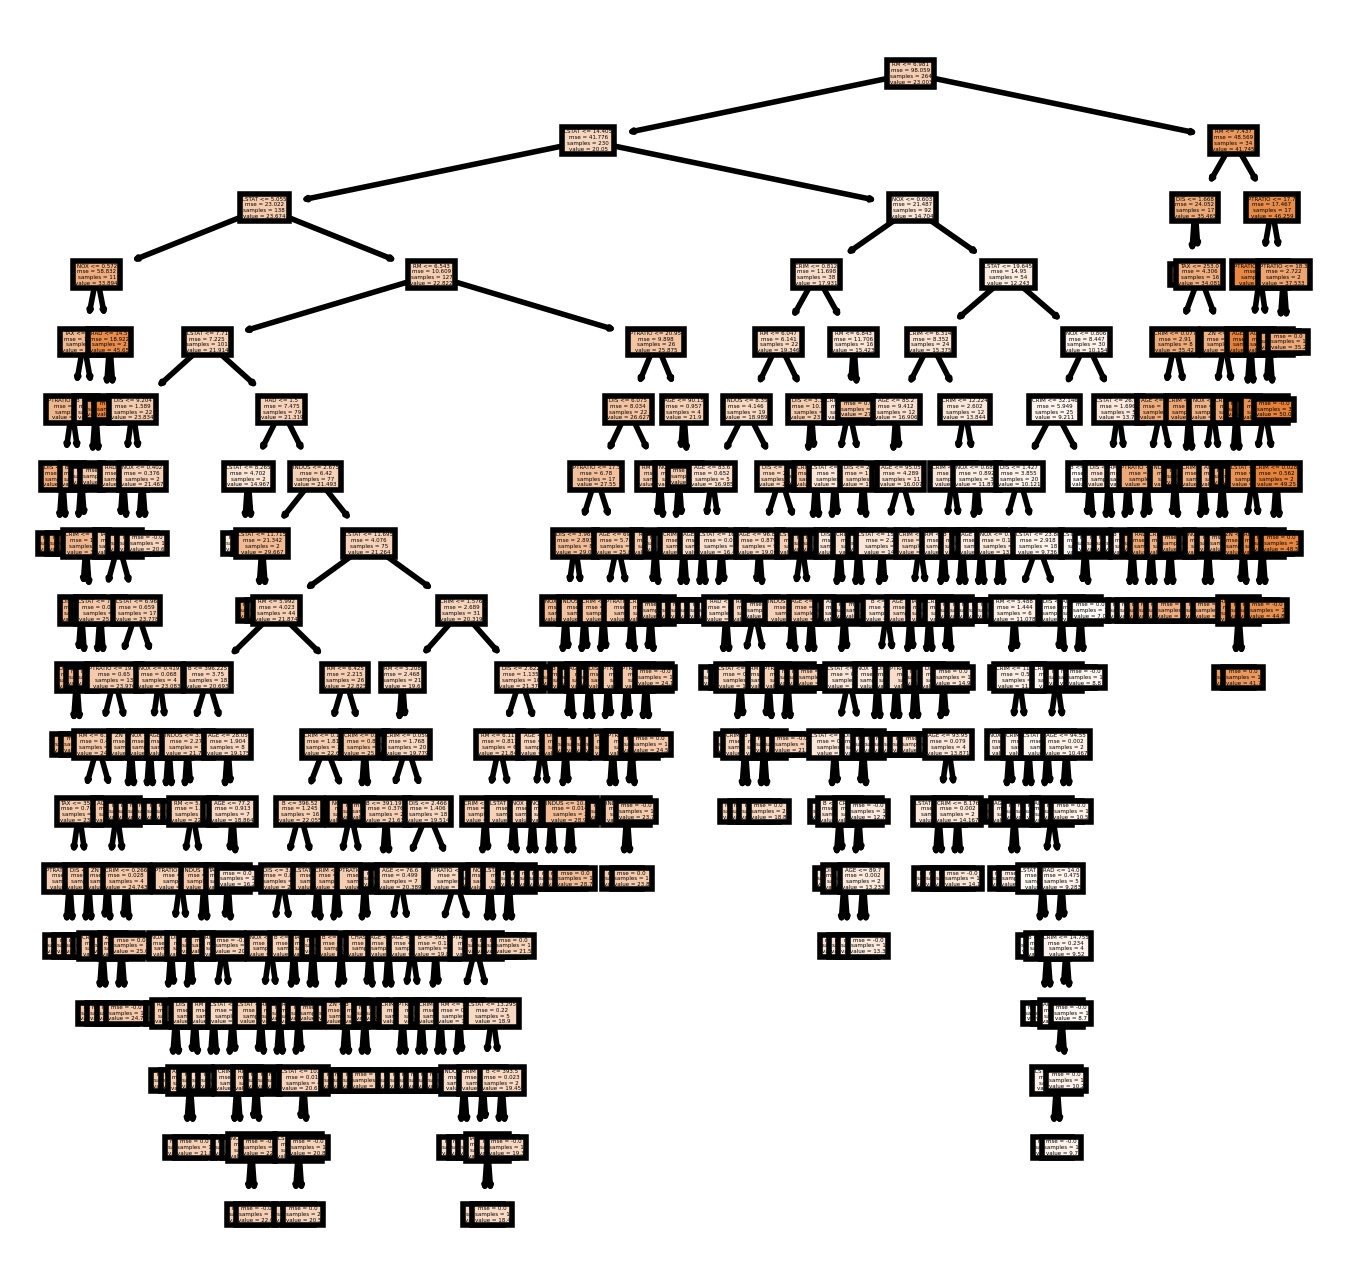

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(rf_model.estimators_[0],
               feature_names = X_train.columns,
               filled = True);

## Entrenando y prediciendo con un solo árbol y 20 datos como mínimo split

In [ ]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=1, min_samples_split=20)


rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5.662791


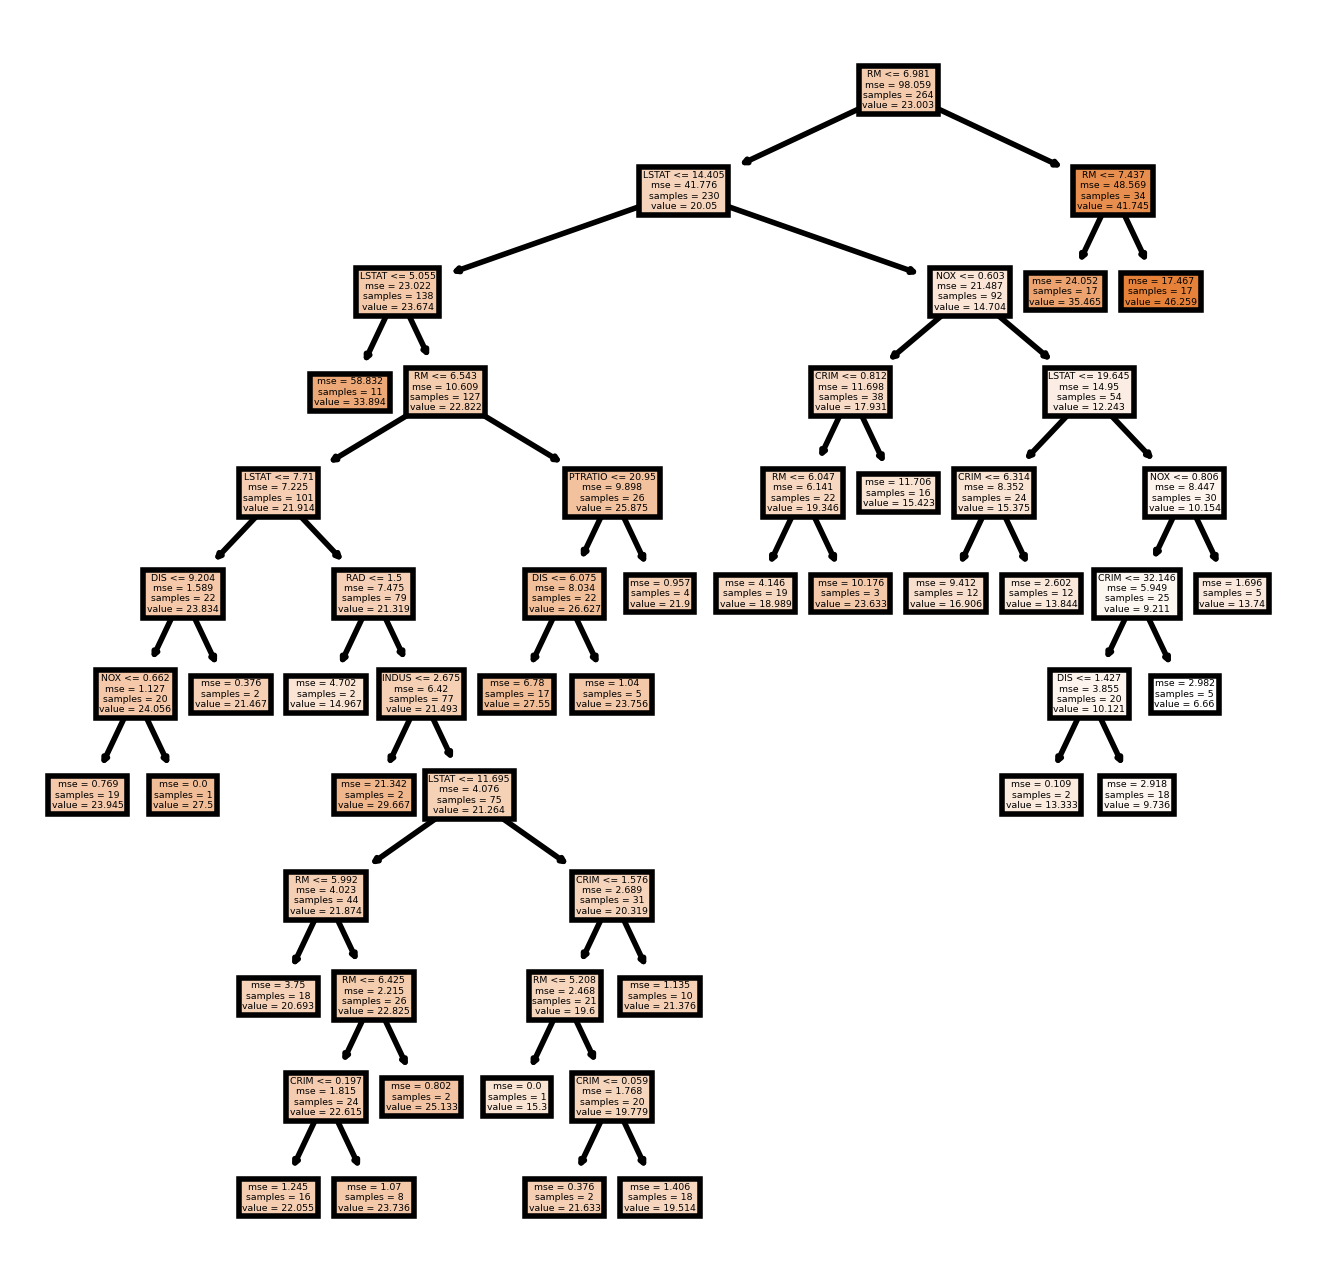

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(rf_model.estimators_[0],
               feature_names = X_train.columns,
               filled = True);

# XGBoost

## Hiper-parámetros

* **learning_rate:** tasa de aprendizaje
* **max_depth:** máxima profundidad de cada árbol
* **subsample:** porcentaje de muestras usadas para cada árbol (valor muy bajo, posible underfitting)
* **colsample_bytree:** porcentaje de features usadas para cada árbol (valores muy alto, posible overfitting)
* **n_estimators:** cantidad de árboles a construir.
* **objective:** función de error a utilizar (algunas: reg:squarederror para regresión, reg:logistic o binary:logistic para clasificación)

Parámetros de regularización:

* **gamma:** umbral para hacer split basado en la reducción de error de hacer el nuevo split.
* **alpha:** regularización para los pesos de las hojas. Un valor más alto genera una mayor regularización.
* **lambda:** similar alpha pero para la sintonia fina.

## Instanciamos el regresor de XGBoost

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

## Entrenamos

In [ ]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

## Predecimos

In [ ]:
preds = xg_reg.predict(X_test)

## Calculamos el error en las predicciones

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.449300


## Entrenando y prediciendo con 100 árboles

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 3.851546


## Entrenando y prediciendo con 100 árboles y máxima profundidad de 4

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 3.702329


## K-fold cross validation

Se usa el método **cv**

Hiper-parámetros:

* **nfolds:** K del k-fold
* **num_boost_round:** cantidad de árboles a contruir (n_estimators)
* **metrics:** la métrica de evaluación a utilizar
* **as_pandas:** si los resultados lo devuelve en un DataFrame de pandas
* **early_stopping_rounds:** terminar antes si la métrica no mejora luego de una cantidad de pasadas
* **seed:** semilla para poder reproducir los resultados


## Convertimos los datos a DMatrix

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

## Entrenamos

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

## Información de los resultados

In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.679234,0.025626,21.677613,0.050617
1,19.772293,0.016054,19.773320,0.020571
2,18.049563,0.058904,18.065856,0.082746
3,16.430113,0.013615,16.492199,0.020919
4,15.025977,0.062132,15.132644,0.073104


## Error final

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.975679
Name: test-rmse-mean, dtype: float64


## Visualizando los árboles

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

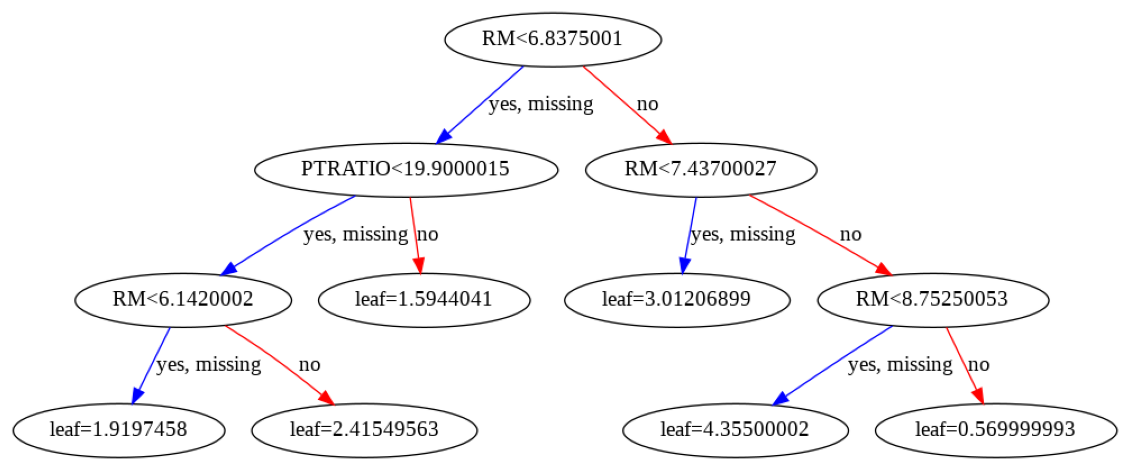

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]
xgb.plot_tree(xg_reg,num_trees=0)

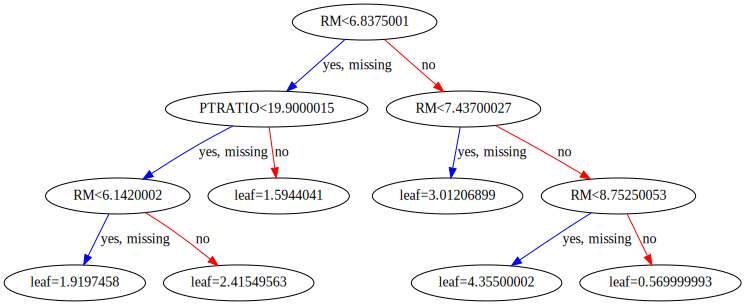

In [ ]:
xgb.to_graphviz(xg_reg,num_trees=0)

## Importancia de los features (cuantas veces aparecen en los árboles)

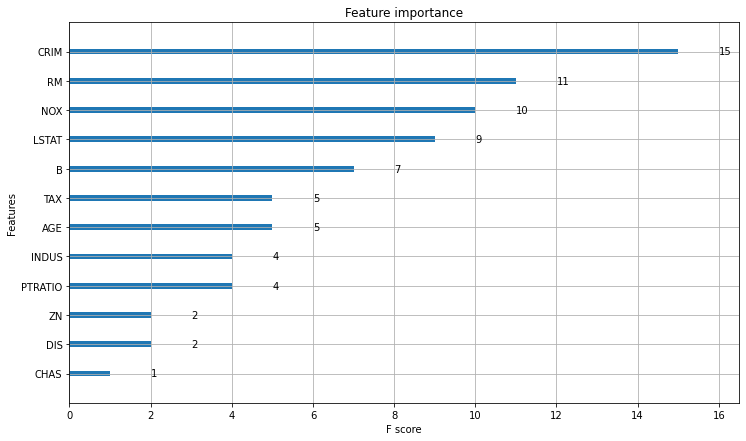

In [ ]:
plt.rcParams['figure.figsize'] = [12, 7]
xgb.plot_importance(xg_reg)

# LightGBM

In [ ]:
import lightgbm as lgb



*   Buckets basados en histogramas para variables continuas.
*   Diferencia en cómo construye el árbol (leaf-wise vs level-wise).
*   Manejo de variables categóricas mediante una variante de target encoding.



## Hiper-parámetros



*   **objective**: regression, binary, multiclass, etc (regression)
*   **num_iterations**: iteraciones de boosting (100)
*   **learning_rate**: tasa de aprendizaje (0.1)
*   **num_leaves**: cantidad máxima de hojas en un árbol (31)
*   **max_depth**: profundidad máxima (-1)
*   **min_data_in_leaf**: cantidad mínima de datos en una hoja (20)
*   **feature_fraction**: fracción de los features a utilizar en cada árbol (1.0)
*   **max_bin**: cantidad máxima de bins a utilizar para feature continua (255)
*   **categorical_feature**: indica cuales son las features categóricas.
*   **metric**: métrica a evaluar en el set de test.


In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

params = {
    'objective': 'regression',
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=10)

preds = gbm.predict(X_test, num_iteration=gbm.best_iteration)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	val

In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 5,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=10)

preds = gbm.predict(X_test, num_iteration=gbm.best_iteration)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[1]	valid_0's rmse: 8.78625
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 8.46474
[3]	valid_0's rmse: 8.17098
[4]	valid_0's rmse: 7.91768
[5]	valid_0's rmse: 7.68811
[6]	valid_0's rmse: 7.45282
[7]	valid_0's rmse: 7.22523
[8]	valid_0's rmse: 7.00199
[9]	valid_0's rmse: 6.81744
[10]	valid_0's rmse: 6.64442
[11]	valid_0's rmse: 6.51593
[12]	valid_0's rmse: 6.38722
[13]	valid_0's rmse: 6.2577
[14]	valid_0's rmse: 6.12751
[15]	valid_0's rmse: 6.01742
[16]	valid_0's rmse: 5.91648
[17]	valid_0's rmse: 5.80506
[18]	valid_0's rmse: 5.7374
[19]	valid_0's rmse: 5.67837
[20]	valid_0's rmse: 5.57799
[21]	valid_0's rmse: 5.48374
[22]	valid_0's rmse: 5.40807
[23]	valid_0's rmse: 5.37874
[24]	valid_0's rmse: 5.3308
[25]	valid_0's rmse: 5.27676
[26]	valid_0's rmse: 5.21845
[27]	valid_0's rmse: 5.17864
[28]	valid_0's rmse: 5.14161
[29]	valid_0's rmse: 5.11187
[30]	valid_0's rmse: 5.07079
[31]	valid_0's rmse: 5.04007
[32]	valid_0's rmse: 5.00913
[33]	valid_0's rmse: 4

# CatBoost



*   Permite tambien features categóricos.
*   Buenos resultados con hiper-parámetros por defecto.




In [ ]:
!pip install catboost

     |████████████████████████████████| 64.8MB 59kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

Learning rate set to 0.033215
0:	learn: 9.0200572	total: 49.1ms	remaining: 49.1s
1:	learn: 8.8368888	total: 51.3ms	remaining: 25.6s
2:	learn: 8.6529397	total: 53.6ms	remaining: 17.8s
3:	learn: 8.5013791	total: 61.1ms	remaining: 15.2s
4:	learn: 8.3647939	total: 64.8ms	remaining: 12.9s
5:	learn: 8.2058523	total: 68.2ms	remaining: 11.3s
6:	learn: 8.0506000	total: 70.4ms	remaining: 9.98s
7:	learn: 7.9044517	total: 72.6ms	remaining: 9s
8:	learn: 7.7642129	total: 74.6ms	remaining: 8.21s
9:	learn: 7.6191667	total: 76.7ms	remaining: 7.59s
10:	learn: 7.4897464	total: 79ms	remaining: 7.1s
11:	learn: 7.3488917	total: 81ms	remaining: 6.67s
12:	learn: 7.2121147	total: 83.1ms	remaining: 6.31s
13:	learn: 7.0841651	total: 85.3ms	remaining: 6s
14:	learn: 6.9737990	total: 87.3ms	remaining: 5.73s
15:	learn: 6.8474248	total: 89.4ms	remaining: 5.5s
16:	learn: 6.7358406	total: 91.5ms	remaining: 5.29s
17:	learn: 6.6207302	total: 93.6ms	remaining: 5.1s
18:	learn: 6.5028832	total: 95.6ms	remaining: 4.93s
19:	l